In [2]:
!pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 4.0 MB/s 
     |████████████████████████████████| 106 kB 54.1 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 293 kB 63.6 MB/s 


In [3]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 1.6 MB/s 


In [4]:
from binance.client import Client
import pandas as pd
import mplfinance as mpf

In [5]:
client = Client(tld='us')

In [6]:
bars = client.get_historical_klines('BTCUSDT', '1d', '1 Jan, 2022', '1 Jan, 2023')
df = pd.DataFrame(bars, columns=['Date','Open','High','Low','Close','Volume','Close time',
                                 'Quote asset volume','Number of trades', 'Taker buy base asset volume',
                                 'Taker buy quote asset volume','Ignore'])
df = df.apply(pd.to_numeric)
df['Date'] = pd.to_datetime(df['Date'], unit='ms')
df.set_index('Date', inplace=True)
df = df.iloc[:, :5]

In [7]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-01,46192.43,47939.39,46192.43,47737.60,108.926030
2022-01-02,47716.44,47975.79,46675.97,47339.15,86.077014
2022-01-03,47300.67,47573.70,45688.53,46438.64,134.352863
2022-01-04,46494.93,47535.30,45518.00,45849.98,98.406846
2022-01-05,45838.76,47056.53,42504.51,43438.22,282.935453
...,...,...,...,...,...
2022-12-28,16707.35,16783.90,16471.43,16545.89,1491.096529
2022-12-29,16547.63,16662.69,16492.62,16634.04,748.759690
2022-12-30,16631.15,16650.64,16369.84,16609.35,1080.822896


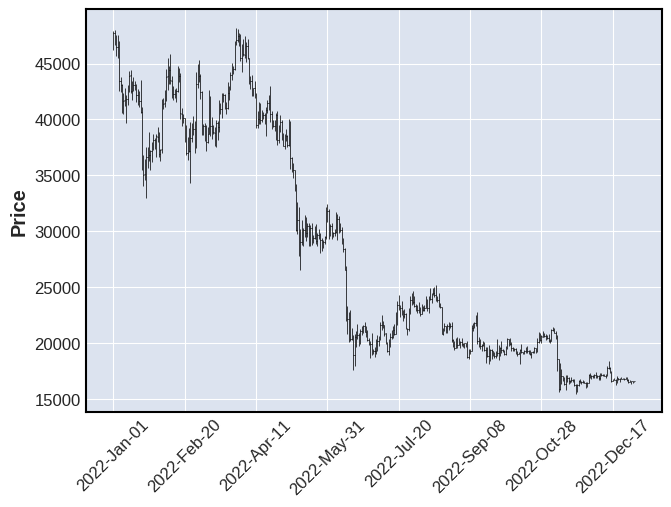

In [8]:
mpf.plot(df)

In [9]:
df['ema_short'] = df.Close.ewm(span=12, adjust=False,min_periods=12).mean()
df['ema_long'] = df.Close.ewm(span=26, adjust=False,min_periods=26).mean()

In [10]:
df

,Open,High,Low,Close,Volume,ema_short,ema_long
Date,,,,,,,
2022-01-01,46192.43,47939.39,46192.43,47737.60,108.926030,NaN,NaN
2022-01-02,47716.44,47975.79,46675.97,47339.15,86.077014,NaN,NaN
2022-01-03,47300.67,47573.70,45688.53,46438.64,134.352863,NaN,NaN
2022-01-04,46494.93,47535.30,45518.00,45849.98,98.406846,NaN,NaN
2022-01-05,45838.76,47056.53,42504.51,43438.22,282.935453,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-28,16707.35,16783.90,16471.43,16545.89,1491.096529,16808.326858,16929.281610
2022-12-29,16547.63,16662.69,16492.62,16634.04,748.759690,16781.513495,16907.411861
2022-12-30,16631.15,16650.64,16369.84,16609.35,1080.822896,16755.026803,16885.333205


In [11]:
ema_short = mpf.make_addplot(df['ema_short'], color='orange')
ema_long = mpf.make_addplot(df['ema_long'], color='yellow')

In [12]:
ema_list = [ema_short,ema_long]

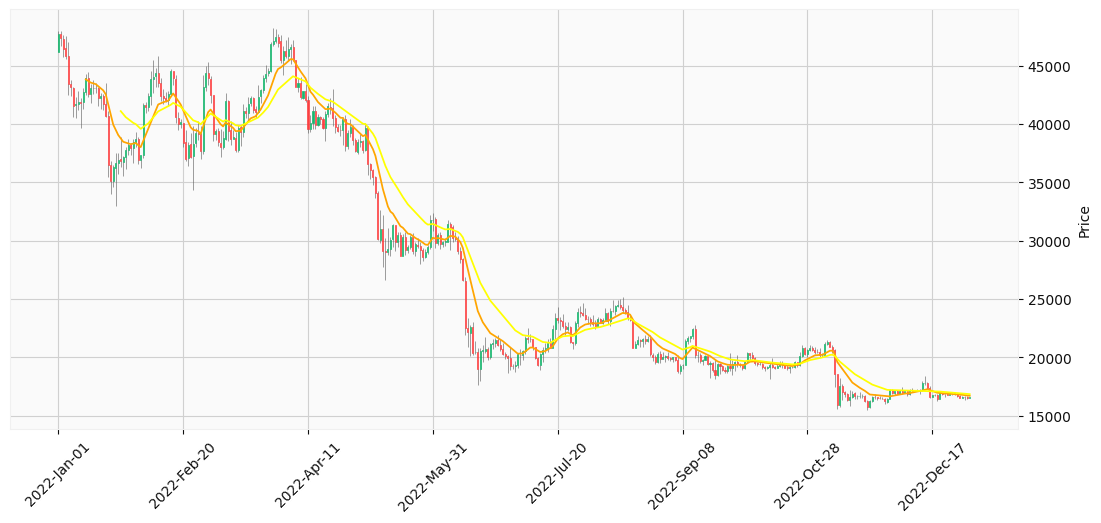

In [13]:
mpf.plot(df,style='yahoo', type='candle', addplot = ema_list,figsize=(14,6))

In [15]:
df['trend'] = df['ema_short'] > df['ema_long']

In [16]:
df

,Open,High,Low,Close,Volume,ema_short,ema_long,trend
Date,,,,,,,,
2022-01-01,46192.43,47939.39,46192.43,47737.60,108.926030,NaN,NaN,False
2022-01-02,47716.44,47975.79,46675.97,47339.15,86.077014,NaN,NaN,False
2022-01-03,47300.67,47573.70,45688.53,46438.64,134.352863,NaN,NaN,False
2022-01-04,46494.93,47535.30,45518.00,45849.98,98.406846,NaN,NaN,False
2022-01-05,45838.76,47056.53,42504.51,43438.22,282.935453,NaN,NaN,False
...,...,...,...,...,...,...,...,...
2022-12-28,16707.35,16783.90,16471.43,16545.89,1491.096529,16808.326858,16929.281610,False
2022-12-29,16547.63,16662.69,16492.62,16634.04,748.759690,16781.513495,16907.411861,False
2022-12-30,16631.15,16650.64,16369.84,16609.35,1080.822896,16755.026803,16885.333205,False


In [17]:
df[df['trend'] == True]

,Open,High,Low,Close,Volume,ema_short,ema_long,trend
Date,,,,,,,,
2022-02-08,43854.64,45483.41,42673.45,44027.06,458.743737,40773.624736,40591.493355,True
2022-02-09,44081.06,44803.47,43136.03,44382.13,266.098958,41328.779392,40872.281255,True
2022-02-10,44393.58,45827.12,43182.61,43489.69,699.980349,41661.227178,41066.163384,True
2022-02-11,43468.76,43916.66,41946.24,42398.13,351.878349,41774.596843,41164.827578,True
2022-02-12,42366.25,43000.25,41714.68,42252.67,178.724378,41848.146559,41245.408498,True
...,...,...,...,...,...,...,...,...
2022-11-06,21301.02,21363.10,20889.12,20908.79,1404.431226,20559.466972,20193.303351,True
2022-11-07,20901.79,21065.09,20382.71,20589.39,3851.296320,20564.070515,20222.643103,True
2022-11-08,20588.47,20680.56,17466.24,18537.65,11634.442058,20252.313512,20097.828799,True


In [18]:
df.loc[df['Volume'] > 60000]

,Open,High,Low,Close,Volume,ema_short,ema_long,trend
Date,,,,,,,,


In [22]:
df['trend_shift'] = df.trend.shift(1)
df.loc['2022-02':'2022-03'  ]

,Open,High,Low,Close,Volume,ema_short,ema_long,trend,trend_shift
Date,,,,,,,,,
2022-02-01,38471.00,39290.74,38011.11,38694.40,294.273931,38356.375789,39981.838690,False,False
2022-02-02,38721.10,38857.95,36596.20,36907.94,202.048585,38133.539513,39754.142491,False,False
2022-02-03,36901.29,37354.27,36256.76,37296.17,227.736013,38004.713434,39572.070454,False,False
2022-02-04,37333.73,41786.18,37039.57,41578.70,478.786058,38554.557521,39720.709680,False,False
2022-02-05,41578.72,41913.84,40938.83,41413.49,182.508622,38994.393287,39846.100815,False,False
2022-02-06,41450.64,42668.93,41125.74,42412.60,156.954855,39520.271243,40036.211865,False,False
2022-02-07,42407.23,44502.93,41652.86,43822.10,343.482160,40182.091052,40316.648024,False,False
2022-02-08,43854.64,45483.41,42673.45,44027.06,458.743737,40773.624736,40591.493355,True,False
2022-02-09,44081.06,44803.47,43136.03,44382.13,266.098958,41328.779392,40872.281255,True,True


In [23]:
df.loc[(df.trend == True) & (df.trend_shift == False),'action'] = 'buy'
df.loc[(df.trend == False) & (df.trend_shift == True),'action'] = 'sell'

In [24]:
df[df.action=='buy']

,Open,High,Low,Close,Volume,ema_short,ema_long,trend,trend_shift,action
Date,,,,,,,,,,
2022-02-08,43854.64,45483.41,42673.45,44027.06,458.743737,40773.624736,40591.493355,True,False,buy
2022-03-02,44400.00,45300.00,43343.96,43925.39,289.671327,41000.740356,40761.994489,True,False,buy
2022-03-18,40921.53,42325.56,40161.91,41740.59,104.403429,40153.029430,40124.218756,True,False,buy
2022-07-21,23216.53,23425.79,22346.27,23150.42,3376.162305,21840.562766,21720.533048,True,False,buy
2022-10-26,20081.79,21018.68,20052.43,20766.50,8103.200672,19628.745509,19544.144708,True,False,buy
2022-12-14,17782.93,18379.51,17662.65,17804.72,3585.022348,17250.033113,17221.427620,True,False,buy


In [25]:
df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] *0.95
df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] *1.05

In [26]:
df[df.marker_position.notnull()]

,Open,High,Low,Close,Volume,ema_short,ema_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,
2022-02-08,43854.64,45483.41,42673.45,44027.06,458.743737,40773.624736,40591.493355,True,False,buy,40539.7775
2022-02-20,40099.81,40103.58,37988.68,38339.80,181.970588,41149.732175,41238.946562,False,True,sell,42108.7590
2022-03-02,44400.00,45300.00,43343.96,43925.39,289.671327,41000.740356,40761.994489,True,False,buy,41176.7620
2022-03-06,39381.39,39678.96,38075.60,38403.71,124.690340,40323.326845,40490.421436,False,True,sell,41662.9080
2022-03-18,40921.53,42325.56,40161.91,41740.59,104.403429,40153.029430,40124.218756,True,False,buy,38153.8145
2022-04-11,42082.25,42406.01,39211.50,39530.20,160.300553,43232.418570,43336.083230,False,True,sell,44526.3105
2022-07-21,23216.53,23425.79,22346.27,23150.42,3376.162305,21840.562766,21720.533048,True,False,buy,21228.9565
2022-08-20,20829.28,21361.92,20769.64,21138.83,1828.997659,22900.001408,22986.888584,False,True,sell,22430.0160
2022-10-26,20081.79,21018.68,20052.43,20766.50,8103.200672,19628.745509,19544.144708,True,False,buy,19049.8085


In [27]:
#buy action dataframe
a = df.loc[df.action == 'buy']

#sell action dataframe
b = df.loc[df.action == 'sell']

In [28]:
a

,Open,High,Low,Close,Volume,ema_short,ema_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,
2022-02-08,43854.64,45483.41,42673.45,44027.06,458.743737,40773.624736,40591.493355,True,False,buy,40539.7775
2022-03-02,44400.00,45300.00,43343.96,43925.39,289.671327,41000.740356,40761.994489,True,False,buy,41176.7620
2022-03-18,40921.53,42325.56,40161.91,41740.59,104.403429,40153.029430,40124.218756,True,False,buy,38153.8145
2022-07-21,23216.53,23425.79,22346.27,23150.42,3376.162305,21840.562766,21720.533048,True,False,buy,21228.9565
2022-10-26,20081.79,21018.68,20052.43,20766.50,8103.200672,19628.745509,19544.144708,True,False,buy,19049.8085
2022-12-14,17782.93,18379.51,17662.65,17804.72,3585.022348,17250.033113,17221.427620,True,False,buy,16779.5175


In [29]:
b

,Open,High,Low,Close,Volume,ema_short,ema_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,
2022-02-20,40099.81,40103.58,37988.68,38339.80,181.970588,41149.732175,41238.946562,False,True,sell,42108.7590
2022-03-06,39381.39,39678.96,38075.60,38403.71,124.690340,40323.326845,40490.421436,False,True,sell,41662.9080
2022-04-11,42082.25,42406.01,39211.50,39530.20,160.300553,43232.418570,43336.083230,False,True,sell,44526.3105
2022-08-20,20829.28,21361.92,20769.64,21138.83,1828.997659,22900.001408,22986.888584,False,True,sell,22430.0160
2022-11-09,18538.36,18588.99,15599.99,15922.56,6743.660750,19586.197587,19788.549629,False,True,sell,19518.4395
2022-12-16,17355.01,17526.27,16532.94,16633.71,2945.142181,17169.447376,17187.354050,False,True,sell,18402.5835


In [30]:
import matplotlib.pyplot as plt

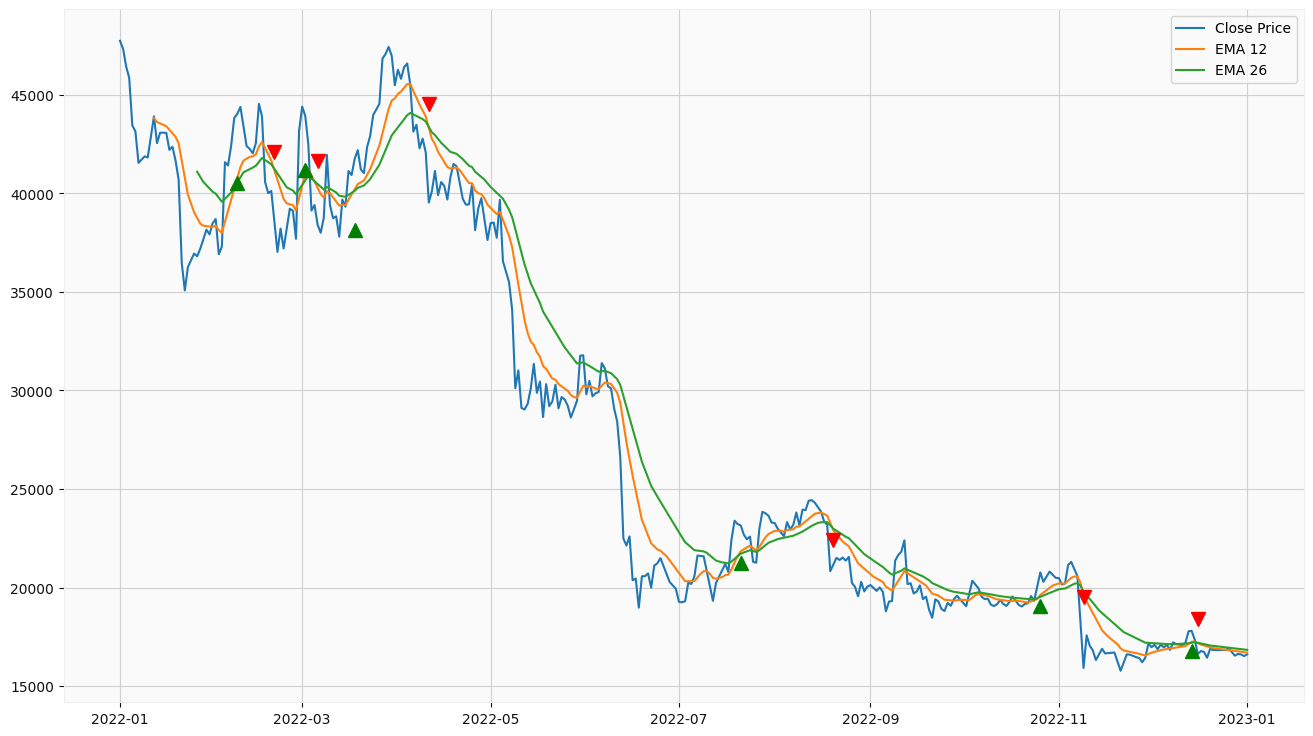

In [31]:
plt.figure(figsize=(16,9))
plt.plot(df.Close, label='Close Price')
plt.plot(df.ema_short, label='EMA 12')
plt.plot(df.ema_long, label='EMA 26')
plt.plot(a.marker_position, 'g^', markersize=10)
plt.plot(b.marker_position, 'rv', markersize=10)
plt.legend()

In [33]:
['^' if x == 'buy' else ('v' if x =='sell' else None) for x in df['action']]
['green' if x == 'buy' else 'red' for x in df['action']]

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 '

In [34]:
markers = ['o' if x == 'buy' else ('v' if x =='sell' else None) for x in df['action']]
color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
plot_signal = mpf.make_addplot(df['marker_position'],type='scatter',markersize= 30, marker=markers,color=color_marker)

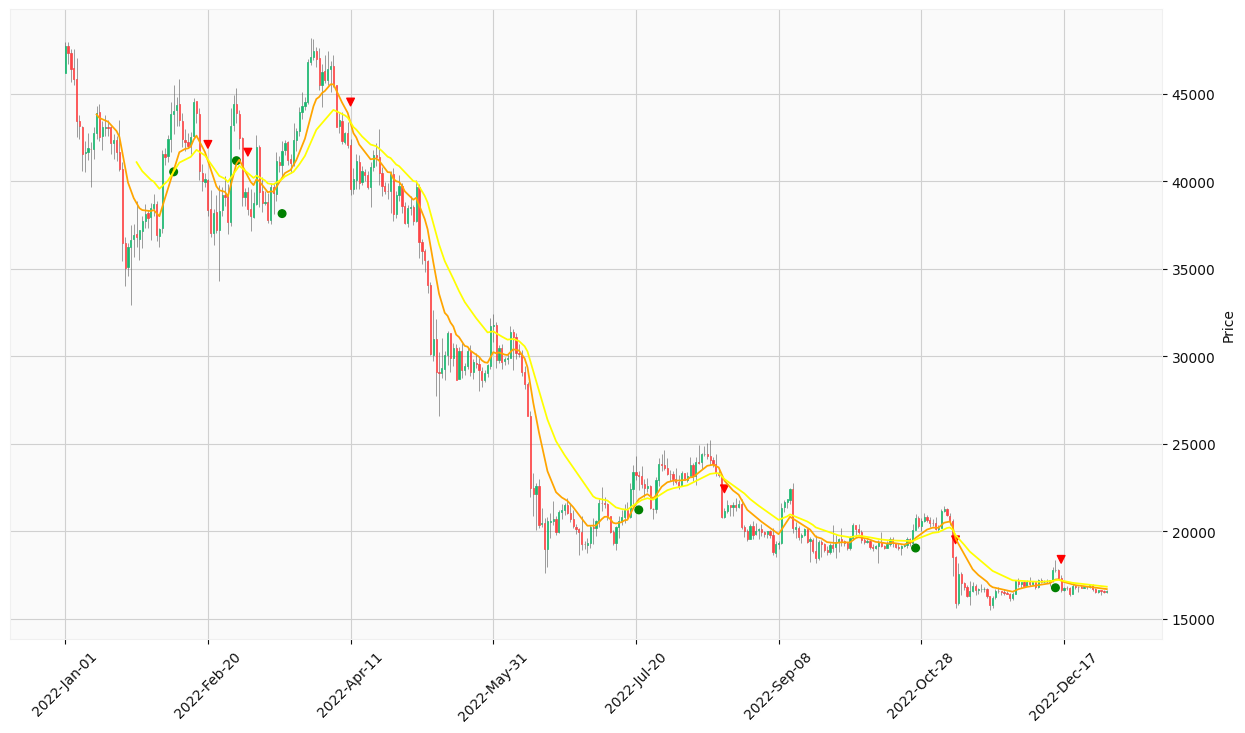

In [35]:
mpf.plot(df,type='candle',style='yahoo',addplot=[ema_short,ema_long,plot_signal],figsize=(16,9))